# Material
```
Material(params: Dict)
```
__params__ can includes the following parameters,
* 'book': book value in catalog of RiiDataFrame. (str)
* 'page': page value in catalog of RiiDataFrame. (str)
* 'RI': Constant refractive index. (complex)
* 'e': Constant permittivity. (complex)
* 'bound_check': True if bound check should be done. Defaults to True. (bool)
* 'im_factor': A magnification factor multiplied to the imaginary part of permittivity. Defaults to 1.0. (float)

This class extends the functionality of RiiMaterial in the following points:
* It is possible to define dielectric materials that has constant permittivity.
* Imaginary part of dielectric function can be magnified using 'im_factor' parameter.
* Material is callable with a single value argument, angular frequency argument ω. The evaluation process is omitted if it is called with the same argument.

However, n, k and eps methos of this class are not numpy.ufunc. You can pass them only a single value.

## Water with constant RI

In [10]:
import numpy as np
from riip import Material
water_const = Material({'RI': 1.333})
wl = [0.5, 1.0, 1.5]
n = water_const.n(wl)
k = water_const.k(wl)
eps = water_const.eps(wl)
print(f"At λ={wl}μm:")
print(f"  n={n}")
print(f"  k={k}")
print(f"  ε={eps}")

At λ=[0.5, 1.0, 1.5]μm:
  n=[1.333 1.333 1.333]
  k=[0. 0. 0.]
  ε=[1.776889+0.j 1.776889+0.j 1.776889+0.j]


## A definition of water in RIID

In [9]:
water = Material({"book": "H2O", "page": "Kedenburg"})
wl = [0.5, 1.0, 1.5]
n = water.n(wl)
k = water.k(wl)
eps = water.eps(wl)
print(f"At λ={wl}μm:")
print(f"  n={n}")
print(f"  k={k}")
print(f"  ε={eps}")

At λ=[0.5, 1.0, 1.5]μm:
  n=[1.33704353 1.32487335 1.31644826]
  k=[1.89394e-09 3.19106e-06 2.56637e-04]
  ε=[1.78768541+5.06456045e-09j 1.75528941+8.45550074e-06j
 1.73303596+6.75698666e-04j]


## Plot them:

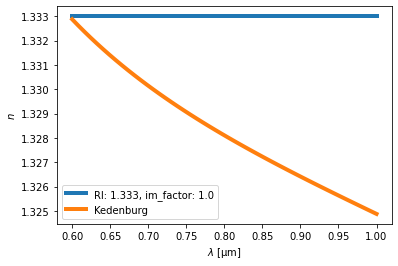

In [12]:
wls = np.linspace(0.6, 1.0)
water_const.plot(wls)
water.plot(wls)


## Material as a function
It is much faster than __eps__ method if the same argument is passed.

In [5]:
gold = Material({'book': 'Au', 'page': 'Stewart-DLF'})

In [6]:
%%timeit
for i in range(1000):
    gold(6.28)

219 µs ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
for i in range(1000):
    gold.eps(1.0)

114 ms ± 9.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## It's __not__ a numpy.ufunc

In [8]:
gold(np.array([6.28, 4.14]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## im_factor

In [20]:
gold_low_loss = Material({'book': 'Au', 'page': 'Stewart-DLF', 'im_factor': 0.1})
print("If im_factor=1.0: Im(ε)=", gold(6.28).imag)
print("If im_factor=0.1: Im(ε)=", gold_low_loss(6.28).imag)

print("Real parts are the same")
print(gold(6.28).real, gold_low_loss(6.28).real)

If im_factor=1.0: Im(ε)= 3.3309657708104417
If im_factor=0.1: Im(ε)= 0.3330965770810442
Real parts are the same
-46.609022195753646 -46.609022195753646
